In [1]:
import sympy as sp
import numpy as np
sp.init_printing()

from sympyutils import *

In [2]:
omega, E, I, rho, a, A, h = sp.symbols('omega E I rho a A h', real=True, positive=True)

In [3]:
Kc = 2*E*I/(h**3) * sp.Matrix([[12, 0], [0, 4*h**2]])
Mc = sp.Matrix([[rho*A*h, 0], [0, rho*A*h**3/210 + rho*I*h/5]])

## 2 Elements

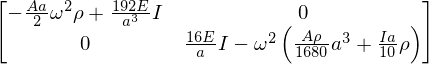

In [4]:
Amat = (Kc - omega**2*Mc).subs(h, a/2)
Amat

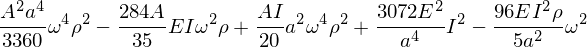

In [5]:
det = Amat.det()
det

In [6]:
%pdb

Automatic pdb calling has been turned ON


In [7]:
w2 = sp.solve(det, omega)
show_list(w2, '\\omega')

<IPython.core.display.Math object>

# 3 Elements

In [8]:
Kcorner = np.array(2*E*I/(h**3) * sp.Matrix([[-6, -3*h], [3*h, h**2]]))
D = np.array(Kc - omega**2*Mc)

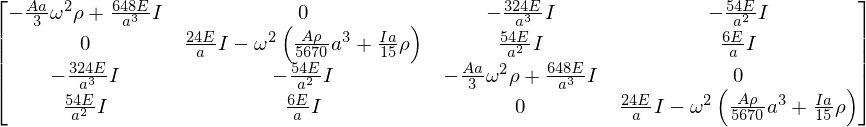

In [9]:
Amat = np.zeros((4, 4), dtype=object)
Amat[np.ix_([0,1], [0,1])] = Amat[np.ix_([2,3], [2,3])] = D
Amat[np.ix_([0,1], [2,3])] = Amat[np.ix_([2,3], [0,1])] = Kcorner
Amat = sp.Matrix(Amat).subs(h, a/3)
Amat

In [10]:
det = Amat.det()
# Too long to show

In [11]:
w3 = sp.solve(det, omega)
show_list(w3, '\\omega')

<IPython.core.display.Math object>

# Comparison

## 2 elements

In [12]:
ex = sp.sqrt(192*E*I/a**3 / (rho*a*A))
subs = [(E, 1), (I, 1), (rho, 1), (a, 1), (A, 1)]
ex = ex.subs(subs)

In [16]:
for w in w2:
    print (w.subs(subs)/ex).evalf(n=4)

0.9102
1.414


## 3 elements

In [17]:
for w in w3:
    print (w.subs(subs)/ex).evalf(n=4)

-1.290
1.290
-3.863
3.863
-1.952 + 0.3333*I
1.952 - 0.3333*I
-1.952 - 0.3333*I
1.952 + 0.3333*I
